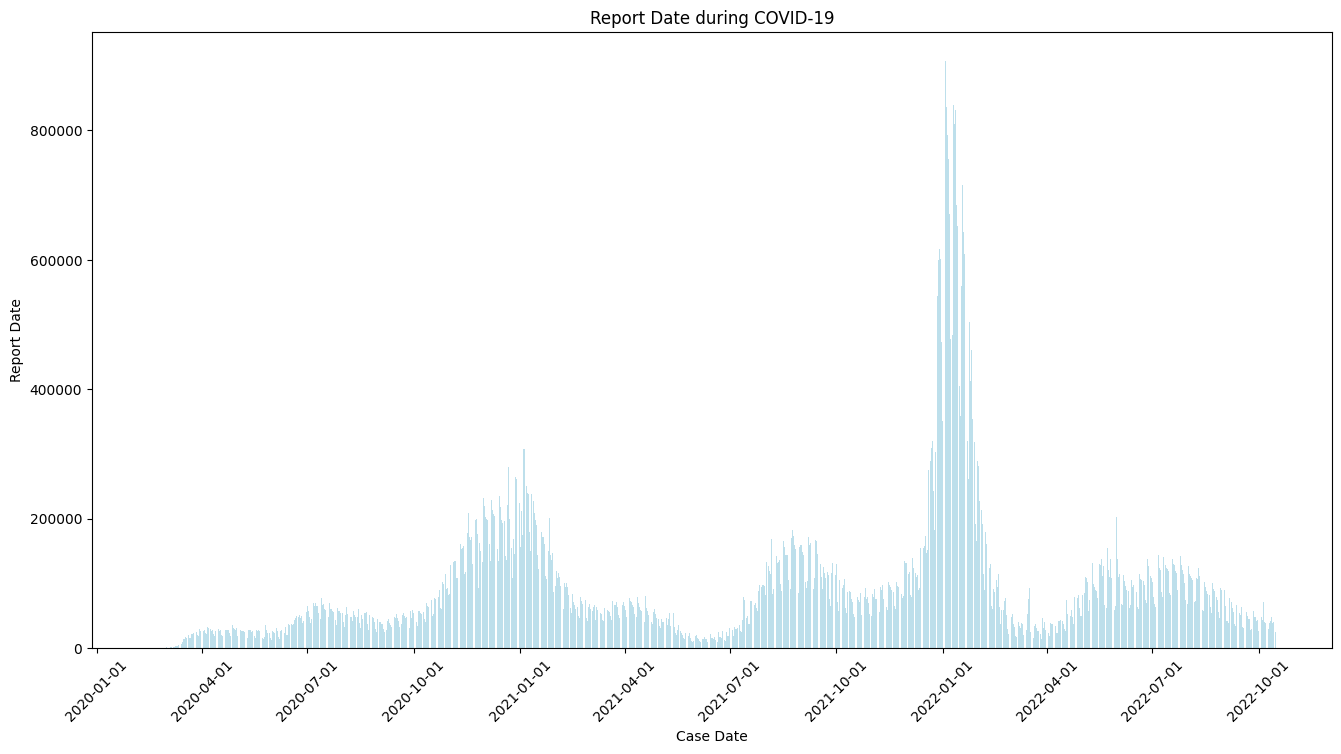

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Read the CSV file
file_path = 'D:\Relationship-Between-COVID-19-and-Human-Behavior\Covid_joined_data.csv'
data = pd.read_csv(file_path)
data['case_dt'] = pd.to_datetime(data['case_dt'], format='%Y/%m/%d')
plt.figure(figsize=(16, 8))

# Extract data for 'Report_dt'
bar_data = data[['case_dt', 'Report_dt']]
# Create a bar plot for the 'Report_dt' column
plt.bar(bar_data['case_dt'], bar_data['Report_dt'], color='lightblue', alpha=0.8)

# Set labels and titles

plt.xlabel('Case Date')
plt.ylabel('Report Date')
plt.title('Report Date during COVID-19')

# Format x-axis tick labels for every 3 months
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=3))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.xticks(rotation=45)

plt.show()


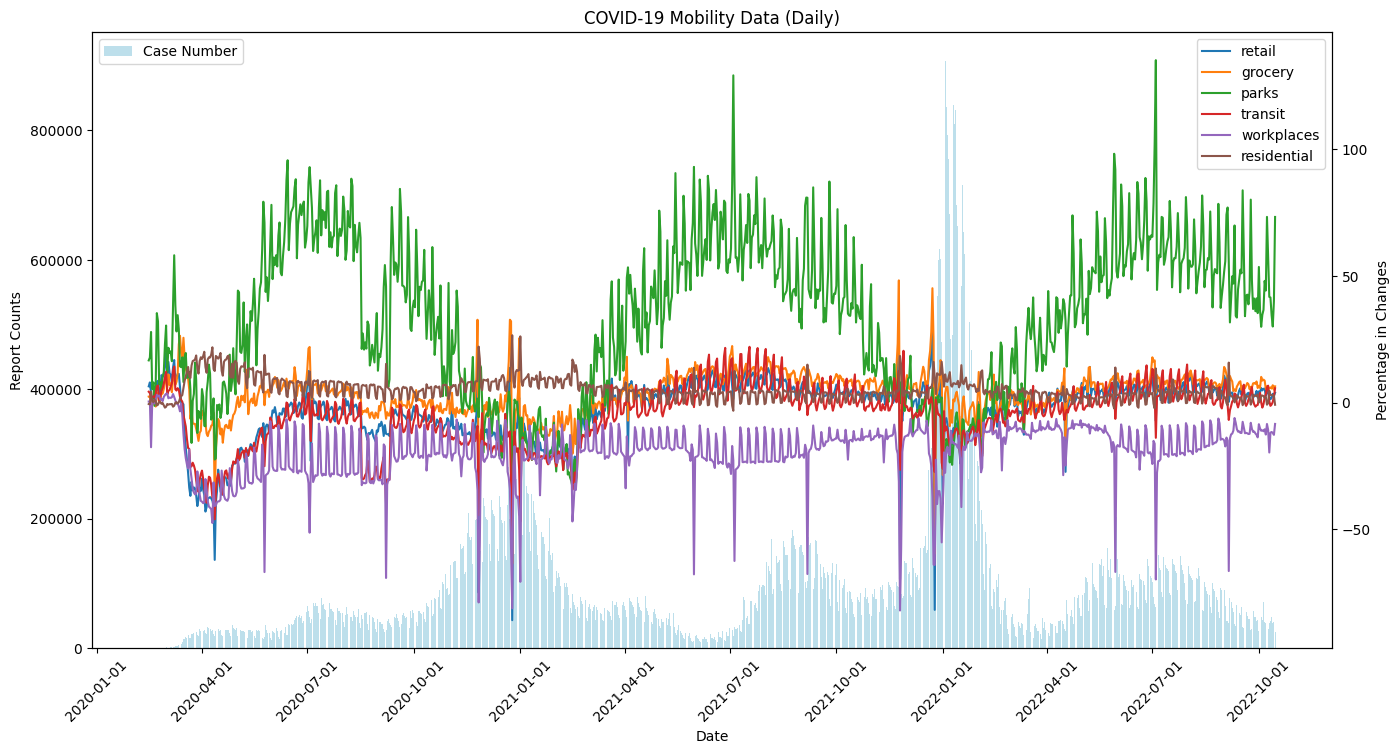

In [6]:
# Extract data for 'Report_dt'
bar_data = data[['case_dt', 'Report_dt']]

# Set the figure size
plt.figure(figsize=(16, 8))

# Create the left y-axis
ax1 = plt.gca()
ax1.bar(bar_data['case_dt'], bar_data['Report_dt'], color='lightblue', alpha=0.8, label='Case Number')

ax1.set_xlabel('Date')

ax1.set_ylabel('Report Counts')
ax1.set_title('COVID-19 Mobility Data (Daily)')

# Format x-axis tick labels for every 3 months
ax1.xaxis.set_major_locator(mdates.MonthLocator(interval=3))
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.xticks(rotation=45)

# Create the right y-axis
ax2 = ax1.twinx()

# Add line plots for other columns
line_columns = [
    'retail_and_recreation_percent_change_from_baseline',
    'grocery_and_pharmacy_percent_change_from_baseline',
    'parks_percent_change_from_baselin',
    'transit_stations_percent_change_from_baseline',
    'Workplaces_percent_change_from_baseline',
    'Residential_percent_change_from_baseline'
]

for col in line_columns:
    ax2.plot(data['case_dt'], data[col], label=col.split('_')[0].lower())  # Multiply by 100 to convert to percentages

# Set the right y-axis label
ax2.set_ylabel('Percentage in Changes')

ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.show()


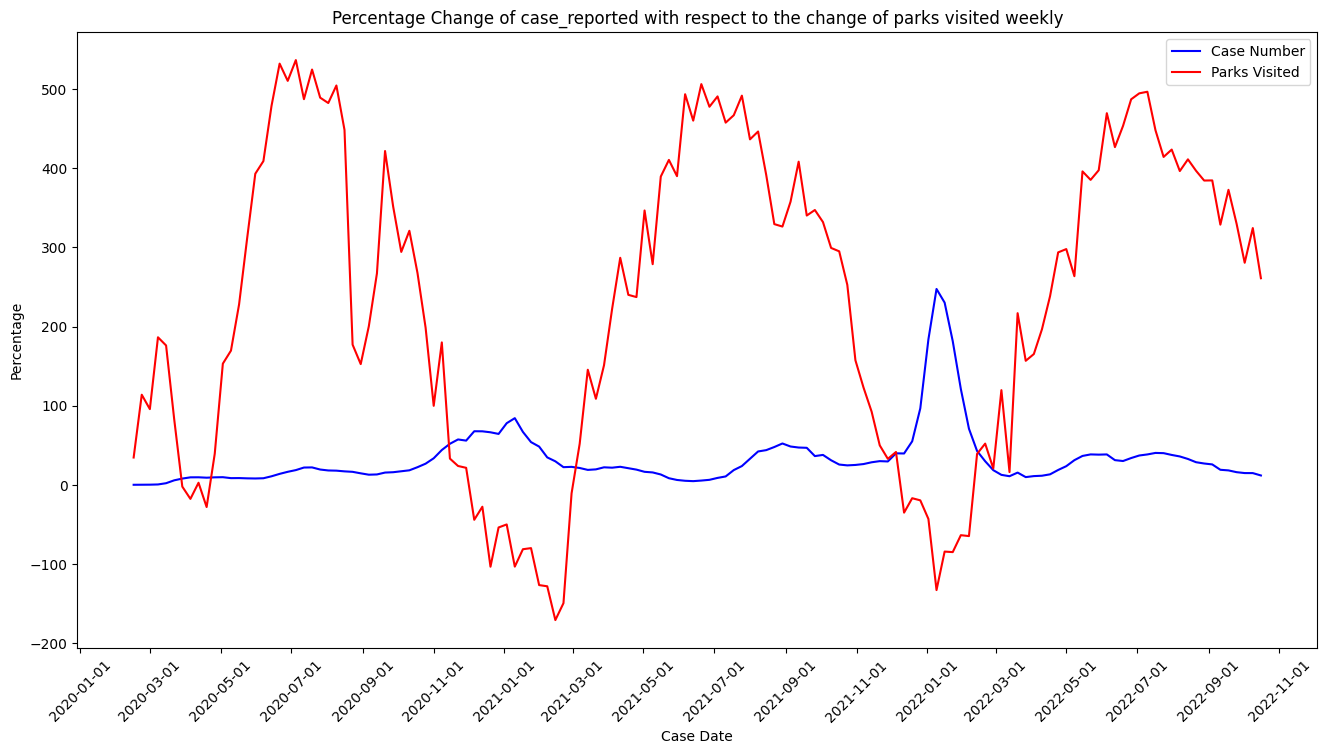

In [8]:
# Read the CSV file and parse the date
data = pd.read_csv(file_path)
data['case_dt'] = pd.to_datetime(data['case_dt'], format='%Y/%m/%d')

# Set the 'case_dt' column as the index
data.set_index('case_dt', inplace=True)

# Calculate the weekly sum of 'Report_dt' and 'parks_percent_change_from_baselin' values
weekly_data = data[['Report_dt', 'parks_percent_change_from_baselin']].resample('W').sum()

# Calculate the percentage change in the weekly 'Report_dt' values with respect to the first week
weekly_data['report_num_change'] = (weekly_data['Report_dt'] / weekly_data['Report_dt'].iloc[0] - 1) /100

# Reset the index
weekly_data = weekly_data.reset_index()

# Set the figure size
plt.figure(figsize=(16, 8))

# Plot the weekly percentage change of 'Report_dt'
plt.plot(weekly_data['case_dt'], weekly_data['report_num_change'], label='Case Number', color='blue')

# Plot the weekly sum of 'parks_percent_change_from_baselin'
plt.plot(weekly_data['case_dt'], weekly_data['parks_percent_change_from_baselin'], label='Parks Visited', color='red')

# Set the x-axis label
plt.xlabel('Case Date')

# Set the y-axis label
plt.ylabel('Percentage')

# Set the title
plt.title('Percentage Change of case_reported with respect to the change of parks visited weekly')

# Format x-axis tick labels for every 3 months
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=2))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

# Rotate x-axis labels
plt.xticks(rotation=45)

# Add a legend
plt.legend()

# Show the plot
plt.show()


In [9]:
# Calculate the correlation between 'report_num_change' and 'parks_percent_change_from_baselin'
correlation = weekly_data['report_num_change'].corr(weekly_data['parks_percent_change_from_baselin'])

print(f"Correlation between 'report_num_change' and 'parks_percent_change_from_baselin': {correlation:.2f}")

Correlation between 'report_num_change' and 'parks_percent_change_from_baselin': -0.41


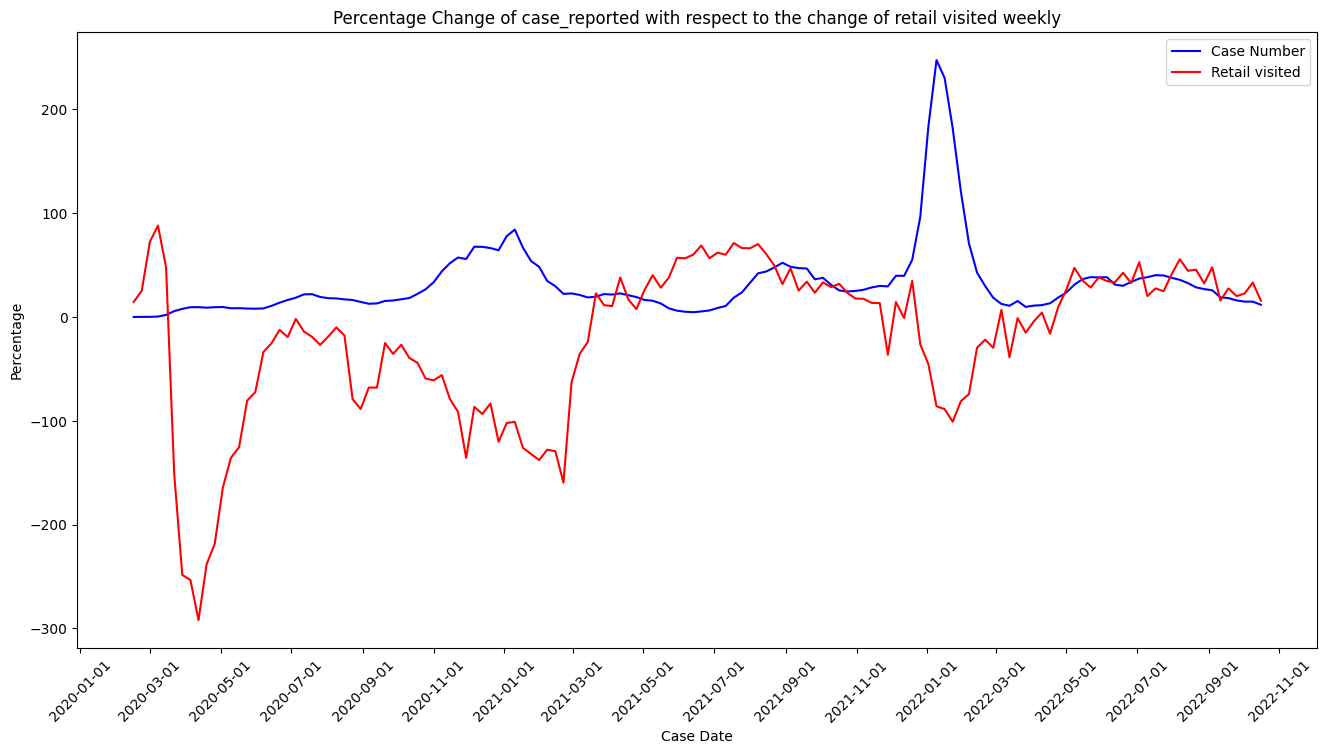

In [10]:
# Read the CSV file and parse the date
data = pd.read_csv(file_path)
data['case_dt'] = pd.to_datetime(data['case_dt'], format='%Y/%m/%d')

# Set the 'case_dt' column as the index
data.set_index('case_dt', inplace=True)

# Calculate the weekly sum of 'Report_dt' and 'retails_percent_change_from_baselin' values
weekly_data = data[['Report_dt', 'retail_and_recreation_percent_change_from_baseline']].resample('W').sum()

# Calculate the percentage change in the weekly 'Report_dt' values with respect to the first week
weekly_data['report_num_change'] = (weekly_data['Report_dt'] / weekly_data['Report_dt'].iloc[0] - 1) /100

# Reset the index
weekly_data = weekly_data.reset_index()

# Set the figure size
plt.figure(figsize=(16, 8))

# Plot the weekly percentage change of 'Report_dt'
plt.plot(weekly_data['case_dt'], weekly_data['report_num_change'], label='Case Number', color='blue')

# Plot the weekly sum of 'parks_percent_change_from_baselin'
plt.plot(weekly_data['case_dt'], weekly_data['retail_and_recreation_percent_change_from_baseline'], label='Retail visited', color='red')

# Set the x-axis label
plt.xlabel('Case Date')

# Set the y-axis label
plt.ylabel('Percentage')

# Set the title
plt.title('Percentage Change of case_reported with respect to the change of retail visited weekly')

# Format x-axis tick labels for every 3 months
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=2))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

# Rotate x-axis labels
plt.xticks(rotation=45)

# Add a legend
plt.legend()

# Show the plot
plt.show()


In [11]:
# Calculate the correlation between 'report_num_change' and 'parks_percent_change_from_baselin'
correlation = weekly_data['report_num_change'].corr(weekly_data['retail_and_recreation_percent_change_from_baseline'])

print(f"Correlation between 'report_num_change' and 'retail_and_recreation_percent_change_from_baseline': {correlation:.2f}")

Correlation between 'report_num_change' and 'retail_and_recreation_percent_change_from_baseline': -0.17


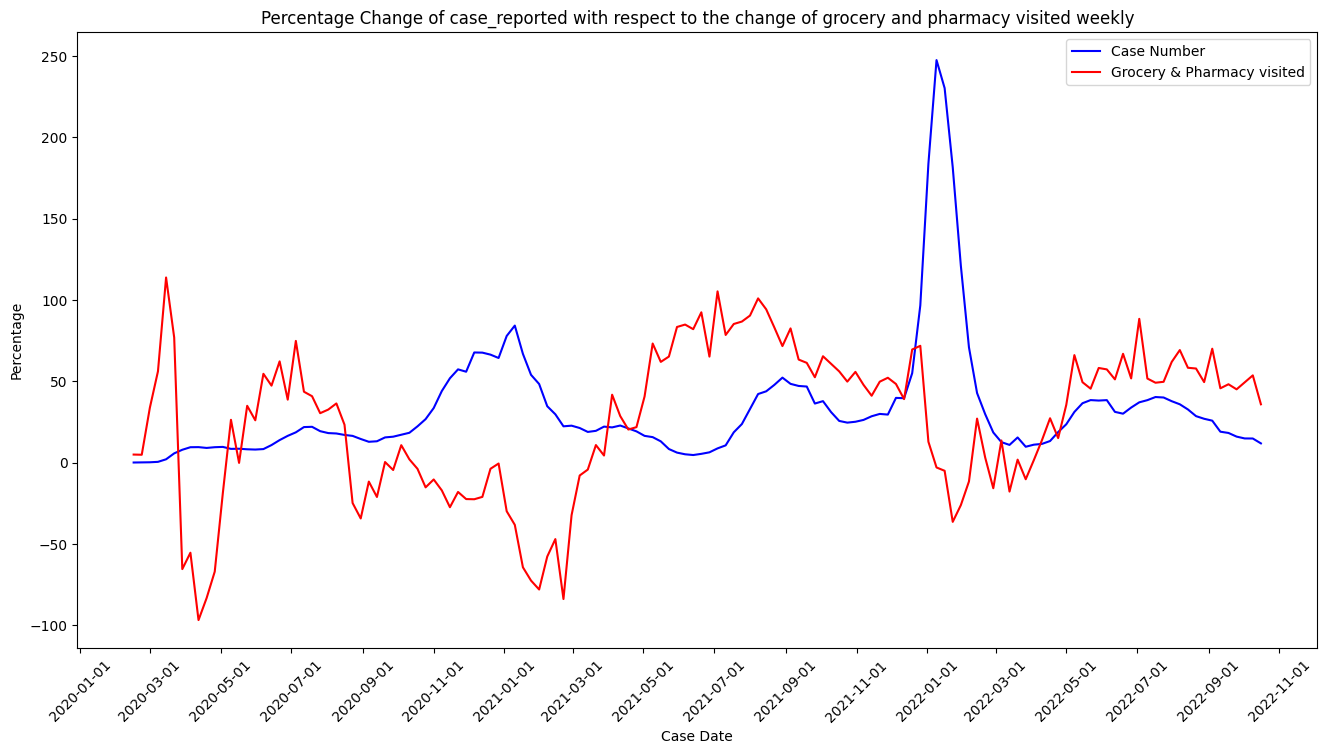

In [12]:
# Read the CSV file and parse the date
data = pd.read_csv(file_path)
data['case_dt'] = pd.to_datetime(data['case_dt'], format='%Y/%m/%d')

# Set the 'case_dt' column as the index
data.set_index('case_dt', inplace=True)

# Calculate the weekly sum of 'Report_dt' and 'retails_percent_change_from_baselin' values
weekly_data = data[['Report_dt', 'grocery_and_pharmacy_percent_change_from_baseline']].resample('W').sum()

# Calculate the percentage change in the weekly 'Report_dt' values with respect to the first week
weekly_data['report_num_change'] = (weekly_data['Report_dt'] / weekly_data['Report_dt'].iloc[0] - 1) /100

# Reset the index
weekly_data = weekly_data.reset_index()

# Set the figure size
plt.figure(figsize=(16, 8))

# Plot the weekly percentage change of 'Report_dt'
plt.plot(weekly_data['case_dt'], weekly_data['report_num_change'], label='Case Number', color='blue')

# Plot the weekly sum of 'parks_percent_change_from_baselin'
plt.plot(weekly_data['case_dt'], weekly_data['grocery_and_pharmacy_percent_change_from_baseline'], label='Grocery & Pharmacy visited', color='red')

# Set the x-axis label
plt.xlabel('Case Date')

# Set the y-axis label
plt.ylabel('Percentage')

# Set the title
plt.title('Percentage Change of case_reported with respect to the change of grocery and pharmacy visited weekly')

# Format x-axis tick labels for every 3 months
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=2))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

# Rotate x-axis labels
plt.xticks(rotation=45)

# Add a legend
plt.legend()

# Show the plot
plt.show()


In [13]:
# Calculate the correlation between 'report_num_change' and 'grocery_and_pharmacy_percent_change_from_baseline'
correlation = weekly_data['report_num_change'].corr(weekly_data['grocery_and_pharmacy_percent_change_from_baseline'])

print(f"Correlation between 'report_num_change' and 'grocery_and_pharmacy_percent_change_from_baseline': {correlation:.2f}")

Correlation between 'report_num_change' and 'retail_and_recreation_percent_change_from_baseline': -0.17


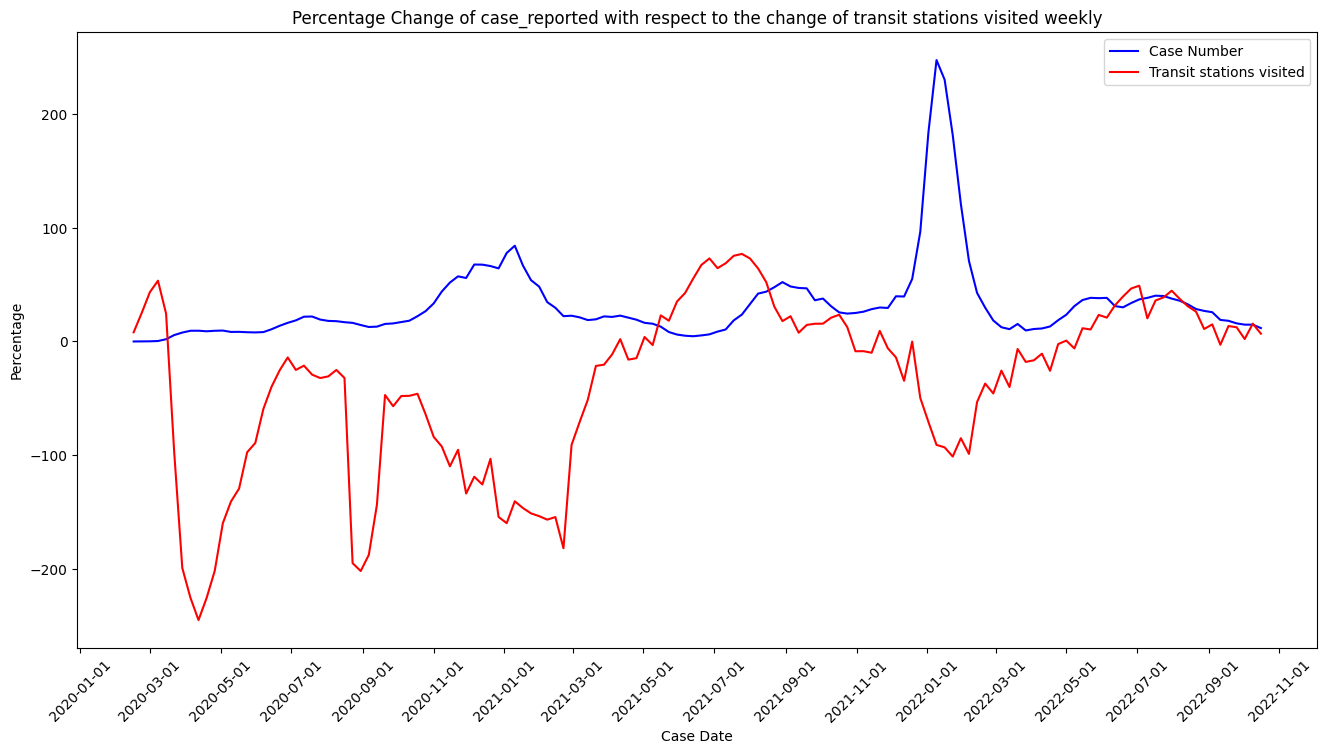

In [14]:
# Read the CSV file and parse the date
data = pd.read_csv(file_path)
data['case_dt'] = pd.to_datetime(data['case_dt'], format='%Y/%m/%d')

# Set the 'case_dt' column as the index
data.set_index('case_dt', inplace=True)

# Calculate the weekly sum of 'Report_dt' and 'retails_percent_change_from_baselin' values
weekly_data = data[['Report_dt', 'transit_stations_percent_change_from_baseline']].resample('W').sum()

# Calculate the percentage change in the weekly 'Report_dt' values with respect to the first week
weekly_data['report_num_change'] = (weekly_data['Report_dt'] / weekly_data['Report_dt'].iloc[0] - 1) /100

# Reset the index
weekly_data = weekly_data.reset_index()

# Set the figure size
plt.figure(figsize=(16, 8))

# Plot the weekly percentage change of 'Report_dt'
plt.plot(weekly_data['case_dt'], weekly_data['report_num_change'], label='Case Number', color='blue')

# Plot the weekly sum of 'parks_percent_change_from_baselin'
plt.plot(weekly_data['case_dt'], weekly_data['transit_stations_percent_change_from_baseline'], label='Transit stations visited', color='red')

# Set the x-axis label
plt.xlabel('Case Date')

# Set the y-axis label
plt.ylabel('Percentage')

# Set the title
plt.title('Percentage Change of case_reported with respect to the change of transit stations visited weekly')

# Format x-axis tick labels for every 3 months
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=2))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

# Rotate x-axis labels
plt.xticks(rotation=45)

# Add a legend
plt.legend()

# Show the plot
plt.show()


In [15]:
# Calculate the correlation between 'report_num_change' and 'grocery_and_pharmacy_percent_change_from_baseline'
correlation = weekly_data['report_num_change'].corr(weekly_data['transit_stations_percent_change_from_baseline'])

print(f"Correlation between 'report_num_change' and 'transit_stations_percent_change_from_baseline': {correlation:.2f}")

Correlation between 'report_num_change' and 'transit_stations_percent_change_from_baseline': -0.18


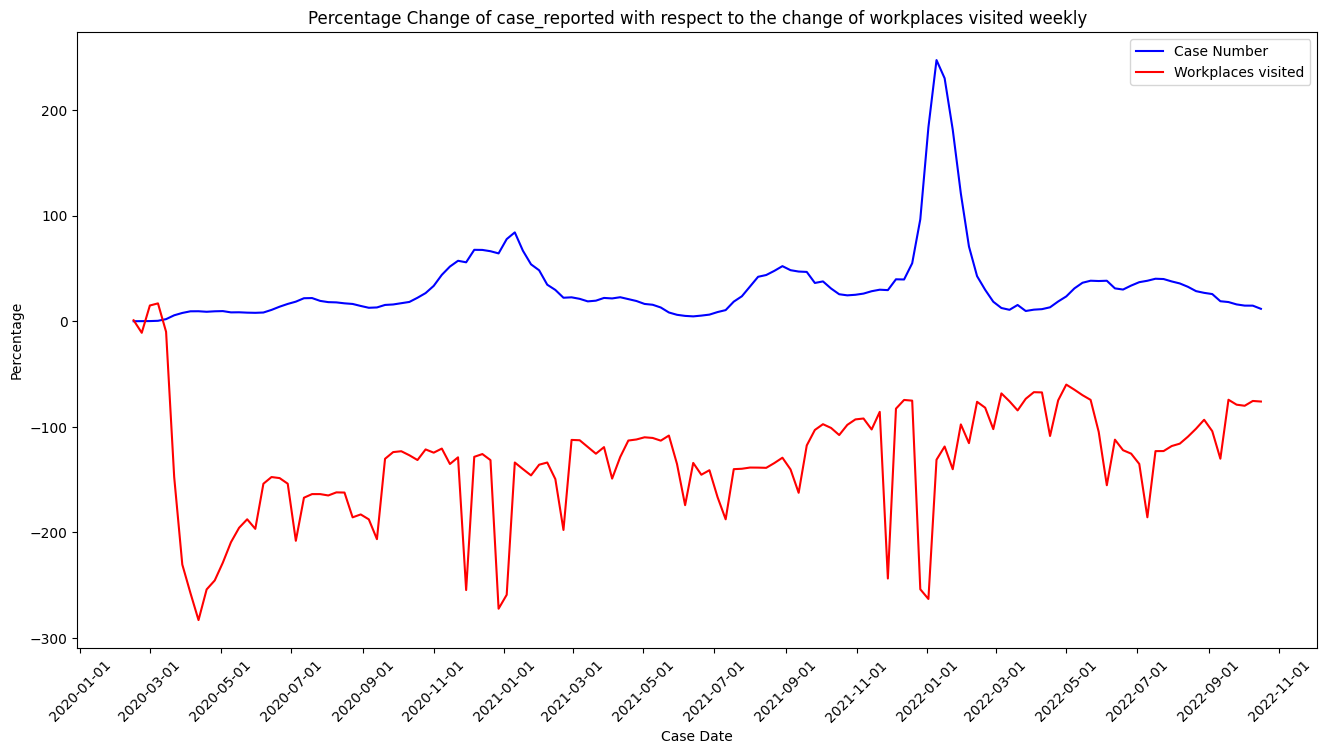

In [16]:
# Read the CSV file and parse the date
data = pd.read_csv(file_path)
data['case_dt'] = pd.to_datetime(data['case_dt'], format='%Y/%m/%d')

# Set the 'case_dt' column as the index
data.set_index('case_dt', inplace=True)

# Calculate the weekly sum of 'Report_dt' and 'retails_percent_change_from_baselin' values
weekly_data = data[['Report_dt', 'Workplaces_percent_change_from_baseline']].resample('W').sum()

# Calculate the percentage change in the weekly 'Report_dt' values with respect to the first week
weekly_data['report_num_change'] = (weekly_data['Report_dt'] / weekly_data['Report_dt'].iloc[0] - 1) /100

# Reset the index
weekly_data = weekly_data.reset_index()

# Set the figure size
plt.figure(figsize=(16, 8))

# Plot the weekly percentage change of 'Report_dt'
plt.plot(weekly_data['case_dt'], weekly_data['report_num_change'], label='Case Number', color='blue')

# Plot the weekly sum of 'parks_percent_change_from_baselin'
plt.plot(weekly_data['case_dt'], weekly_data['Workplaces_percent_change_from_baseline'], label='Workplaces visited', color='red')

# Set the x-axis label
plt.xlabel('Case Date')

# Set the y-axis label
plt.ylabel('Percentage')

# Set the title
plt.title('Percentage Change of case_reported with respect to the change of workplaces visited weekly')

# Format x-axis tick labels for every 3 months
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=2))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

# Rotate x-axis labels
plt.xticks(rotation=45)

# Add a legend
plt.legend()

# Show the plot
plt.show()


In [17]:
# Calculate the correlation between 'report_num_change' and 'grocery_and_pharmacy_percent_change_from_baseline'
correlation = weekly_data['report_num_change'].corr(weekly_data['Workplaces_percent_change_from_baseline'])

print(f"Correlation between 'report_num_change' and 'Workplaces_percent_change_from_baseline': {correlation:.2f}")

Correlation between 'report_num_change' and 'Workplaces_percent_change_from_baseline': -0.13


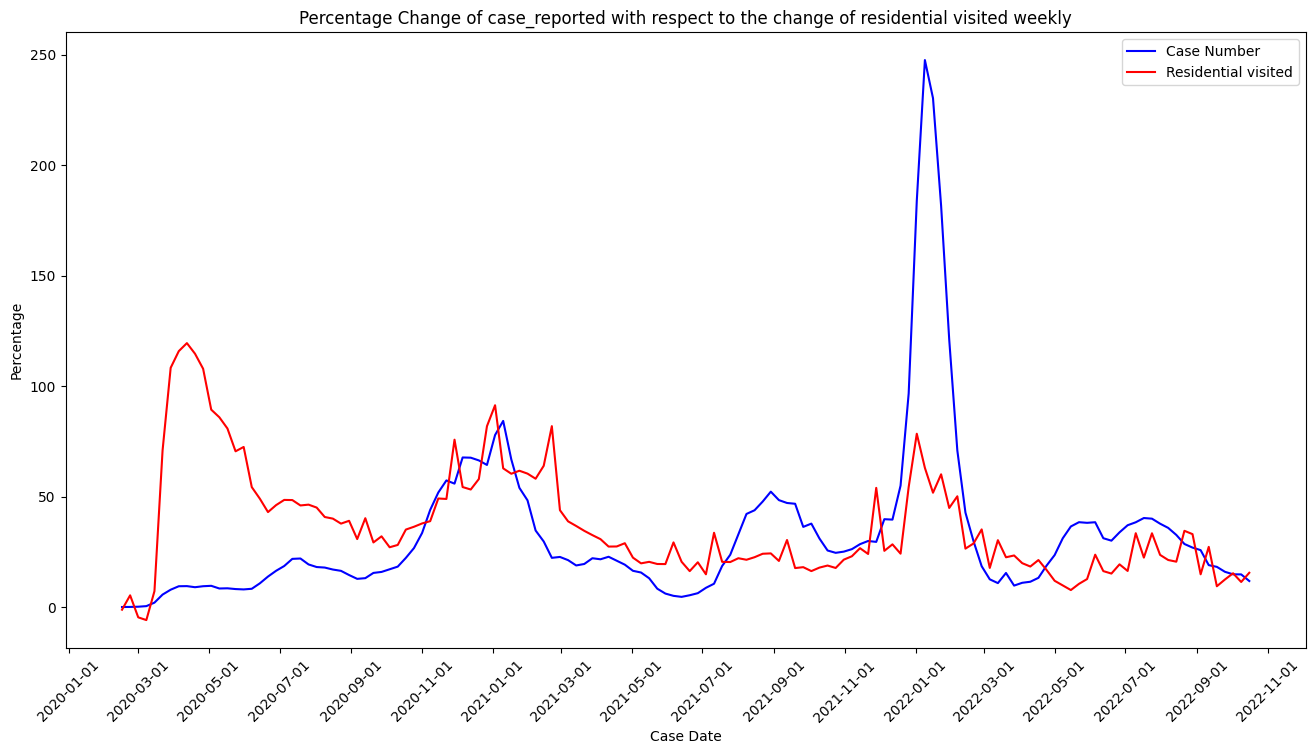

In [18]:
# Read the CSV file and parse the date
data = pd.read_csv(file_path)
data['case_dt'] = pd.to_datetime(data['case_dt'], format='%Y/%m/%d')

# Set the 'case_dt' column as the index
data.set_index('case_dt', inplace=True)

# Calculate the weekly sum of 'Report_dt' and 'retails_percent_change_from_baselin' values
weekly_data = data[['Report_dt', 'Residential_percent_change_from_baseline']].resample('W').sum()

# Calculate the percentage change in the weekly 'Report_dt' values with respect to the first week
weekly_data['report_num_change'] = (weekly_data['Report_dt'] / weekly_data['Report_dt'].iloc[0] - 1) /100

# Reset the index
weekly_data = weekly_data.reset_index()

# Set the figure size
plt.figure(figsize=(16, 8))

# Plot the weekly percentage change of 'Report_dt'
plt.plot(weekly_data['case_dt'], weekly_data['report_num_change'], label='Case Number', color='blue')

# Plot the weekly sum of 'parks_percent_change_from_baselin'
plt.plot(weekly_data['case_dt'], weekly_data['Residential_percent_change_from_baseline'], label='Residential visited', color='red')

# Set the x-axis label
plt.xlabel('Case Date')

# Set the y-axis label
plt.ylabel('Percentage')

# Set the title
plt.title('Percentage Change of case_reported with respect to the change of residential visited weekly')

# Format x-axis tick labels for every 3 months
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=2))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

# Rotate x-axis labels
plt.xticks(rotation=45)

# Add a legend
plt.legend()

# Show the plot
plt.show()


In [19]:
# Calculate the correlation between 'report_num_change' and 'grocery_and_pharmacy_percent_change_from_baseline'
correlation = weekly_data['report_num_change'].corr(weekly_data['Residential_percent_change_from_baseline'])

print(f"Correlation between 'report_num_change' and 'Residential_percent_change_from_baseline': {correlation:.2f}")

Correlation between 'report_num_change' and 'Residential_percent_change_from_baseline': 0.22
